In [14]:
import math
import random 
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import numpy as np

In [15]:
#getting input
V = int(input("Enter the number vertices: "))
adj_mat = []

#creating adj_mat
for i in range(V):
    adj_mat.append([0,]*V)
    
#fill it with random triangle graph
for i in range(1,V+1):
    for j in range(1,V+1):
        adj_mat[i-1][j-1] = math.floor(math.sqrt(2*(((math.sqrt(i))-(math.sqrt(j)))**2))*10000)

INF = float('inf')
for i in range(V):
    adj_mat[i][i] = INF  
    
#print the adj matrix 
for i in range(1,V+1):
    print(adj_mat[i-1])

[inf, 5857, 10352, 14142, 17480, 20498, 23274, 25857, 28284, 30579]
[5857, inf, 4494, 8284, 11622, 14641, 17416, 20000, 22426, 24721]
[10352, 4494, inf, 3789, 7127, 10146, 12921, 15505, 17931, 20226]
[14142, 8284, 3789, inf, 3338, 6356, 9132, 11715, 14142, 16437]
[17480, 11622, 7127, 3338, inf, 3018, 5793, 8377, 10803, 13098]
[20498, 14641, 10146, 6356, 3018, inf, 2775, 5358, 7785, 10080]
[23274, 17416, 12921, 9132, 5793, 2775, inf, 2583, 5009, 7304]
[25857, 20000, 15505, 11715, 8377, 5358, 2583, inf, 2426, 4721]
[28284, 22426, 17931, 14142, 10803, 7785, 5009, 2426, inf, 2294]
[30579, 24721, 20226, 16437, 13098, 10080, 7304, 4721, 2294, inf]


In [3]:
mst_adj_mat = []
parent = [i for i in range(V)]
for i in range(V):
    mst_adj_mat.append([INF,]*V)
    
#kruskal
def find(i):
    while parent[i] != i:
        i = parent[i]
    return i
 

def union(i, j):
    a = find(i)
    b = find(j)
    parent[a] = b
 

def kruskalMST(cost):
    mincost = 0 # Cost of min MST
 
    # Initialize sets of disjoint sets
    for i in range(V):
        parent[i] = i
 
    # Include minimum weight edges one by one
    edge_count = 0
    while edge_count < V - 1:
        min = INF
        a = -1
        b = -1
        for i in range(V):
            for j in range(V):
                if find(i) != find(j) and cost[i][j] < min:
                    min = cost[i][j]
                    a = i
                    b = j
        union(a, b)
        print('Edge {}:({}, {}) cost:{}'.format(edge_count, a, b, min))
        mst_adj_mat[a][b] = min
        mst_adj_mat[b][a] = min        
        edge_count += 1
        mincost += min
 
    print("Minimum cost= {}".format(mincost))
 
kruskalMST(adj_mat)

Edge 0:(8, 9) cost:2294
Edge 1:(7, 8) cost:2426
Edge 2:(6, 7) cost:2583
Edge 3:(5, 6) cost:2775
Edge 4:(4, 5) cost:3018
Edge 5:(3, 4) cost:3338
Edge 6:(2, 3) cost:3789
Edge 7:(1, 2) cost:4494
Edge 8:(0, 1) cost:5857
Minimum cost= 30574


In [4]:
#printing the adj mat for mst
for i in mst_adj_mat:
    print(i)

[inf, 5857, inf, inf, inf, inf, inf, inf, inf, inf]
[5857, inf, 4494, inf, inf, inf, inf, inf, inf, inf]
[inf, 4494, inf, 3789, inf, inf, inf, inf, inf, inf]
[inf, inf, 3789, inf, 3338, inf, inf, inf, inf, inf]
[inf, inf, inf, 3338, inf, 3018, inf, inf, inf, inf]
[inf, inf, inf, inf, 3018, inf, 2775, inf, inf, inf]
[inf, inf, inf, inf, inf, 2775, inf, 2583, inf, inf]
[inf, inf, inf, inf, inf, inf, 2583, inf, 2426, inf]
[inf, inf, inf, inf, inf, inf, inf, 2426, inf, 2294]
[inf, inf, inf, inf, inf, inf, inf, inf, 2294, inf]


In [5]:
#generating dfs
dfs_seq = []
visited = [False] * V

def DFS(start):
    # Print current node
    dfs_seq.append(start)
 
    # Set current node as visited
    visited[start] = True
 
    # For every node of the graph
    vertices = list(range(V))
    random.shuffle(vertices)
    for i in vertices:
             if (mst_adj_mat[start][i] != INF and (not visited[i])):
                DFS(i)
DFS(random.randint(0,V-1))     
dfs_seq.append(dfs_seq[0])
dfs_seq

[6, 5, 4, 3, 2, 1, 0, 7, 8, 9, 6]

In [6]:
min_ham_cost = 0
for i in range(len(dfs_seq)-1):
    min_ham_cost += adj_mat[dfs_seq[i]][dfs_seq[i+1]]

In [7]:
min_ham_cost

61152

In [8]:
import math
import random 
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import numpy as np
import time

mst_costs = []
ham_costs = []
exec_time = []
def solve(V):
   #getting input
    adj_mat = []

    #creating adj_mat
    for i in range(V):
        adj_mat.append([0,]*V)

    #fill it with random triangle graph
    for i in range(1,V+1):
        for j in range(1,V+1):
            adj_mat[i-1][j-1] = math.floor(math.sqrt(2*(((math.sqrt(i))-(math.sqrt(j)))**2))*10000)

    INF = float('inf')
    for i in range(V):
        adj_mat[i][i] = INF  

    print("Adjacency matrix of the complete graph:")    
    #print the adj matrix 
    for i in range(1,V+1):
             print(adj_mat[i-1])
    
    print()
    print()
    
    mst_adj_mat = []
    parent = [i for i in range(V)]
    for i in range(V):
        mst_adj_mat.append([INF,]*V)

    print("Finding mst:")    
    #kruskal
    def find(i):
        while parent[i] != i:
            i = parent[i]
        return i


    def union(i, j):
        a = find(i)
        b = find(j)
        parent[a] = b


    def kruskalMST(cost):
        mincost = 0 # Cost of min MST

        # Initialize sets of disjoint sets
        for i in range(V):
            parent[i] = i

        # Include minimum weight edges one by one
        edge_count = 0
        while edge_count < V - 1:
            min = INF
            a = -1
            b = -1
            for i in range(V):
                for j in range(V):
                    if find(i) != find(j) and cost[i][j] < min:
                        min = cost[i][j]
                        a = i
                        b = j
            union(a, b)
            print('Edge {}:({}, {}) cost:{}'.format(edge_count, a, b, min))
            mst_adj_mat[a][b] = min
            mst_adj_mat[b][a] = min        
            edge_count += 1
            mincost += min

        print("Minimum cost= {}".format(mincost))
        mst_costs.append(mincost)

    kruskalMST(adj_mat)
    
    print("Adjacency matrix of the mst:")
    #printing the adj mat for mst
    for i in mst_adj_mat:
        print(i)
        
    print()
    print()
    
    #generating dfs
    dfs_seq = []
    visited = [False] * V

    def DFS(start):
        # Print current node
        dfs_seq.append(start)

        # Set current node as visited
        visited[start] = True

        # For every node of the graph
        vertices = list(range(V))
        random.shuffle(vertices)
        for i in vertices:
                 if (mst_adj_mat[start][i] != INF and (not visited[i])):
                    DFS(i)
                    
    DFS(random.randint(0,V-1))     
    dfs_seq.append(dfs_seq[0])
    print("Min hamiltonian circuit:")
    print(dfs_seq)
    print()
    print()
    
    min_ham_cost = 0
    for i in range(len(dfs_seq)-1):
        min_ham_cost += adj_mat[dfs_seq[i]][dfs_seq[i+1]]
     
    print("Minimum hamlitonian circuits's cost")     
    print(min_ham_cost)   
    ham_costs.append(min_ham_cost)

In [12]:
n = int(input("Enter the number of vertices till which u have to test: "))
for V in range(5,n+1):
    start = time.time()
    solve(V)
    end = time.time()
    exec_time.append((end-start) * 10**3)
    

Adjacency matrix of the complete graph:
[inf, 5857, 10352, 14142, 17480]
[5857, inf, 4494, 8284, 11622]
[10352, 4494, inf, 3789, 7127]
[14142, 8284, 3789, inf, 3338]
[17480, 11622, 7127, 3338, inf]


Finding mst:
Edge 0:(3, 4) cost:3338
Edge 1:(2, 3) cost:3789
Edge 2:(1, 2) cost:4494
Edge 3:(0, 1) cost:5857
Minimum cost= 17478


AttributeError: 'numpy.ndarray' object has no attribute 'append'

[17478, 20496, 23271, 25854, 28280, 30574]
[34958, 40994, 46545, 51711, 56564, 61152]


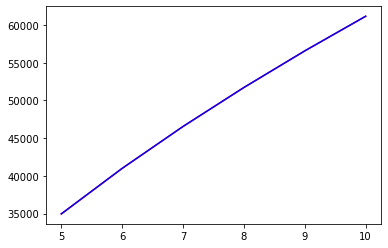

In [10]:
print(mst_costs)
print(ham_costs)
mst_costs = 2*np.array(mst_costs)
ham_costs = np.array(ham_costs)
plt.plot(list(range(5,n+1)),mst_costs,'r',label = "2*mst_cost")
plt.plot(list(range(5,n+1)),ham_costs,'b',label = "min_ham_cost")
plt.show()

In [11]:
exec_time

[1.096963882446289,
 3.367185592651367,
 0.6535053253173828,
 2.743959426879883,
 8.238077163696289,
 2.4597644805908203]